# Data Preparation

## Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing

path = 'https://raw.githubusercontent.com/BimaBayuUWUUU/DSAI_Batch6_Code/main/Dataset/Orange%20Quality%20Data.csv'

In [2]:
df = pd.read_csv(path)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           244 non-null    float64
 1   Weight (g)          242 non-null    float64
 2   Brix (Sweetness)    249 non-null    float64
 3   pH (Acidity)        249 non-null    float64
 4   Softness (1-5)      243 non-null    float64
 5   HarvestTime (days)  249 non-null    int64  
 6   Ripeness (1-5)      245 non-null    float64
 7   Color               249 non-null    object 
 8   Variety             243 non-null    object 
 9   Blemishes (Y/N)     249 non-null    object 
 10  Quality (1-5)       249 non-null    float64
dtypes: float64(7), int64(1), object(3)
memory usage: 21.5+ KB


In [4]:
df.head(5)

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180.0,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220.0,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150.0,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250.0,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210.0,11.5,3.3,2.5,12,5.0,Orange,NaN,Y (Minor),4.5


## Missing Value

In [6]:
df.isnull().sum()

Size (cm)             5
Weight (g)            7
Brix (Sweetness)      0
pH (Acidity)          0
Softness (1-5)        6
HarvestTime (days)    0
Ripeness (1-5)        4
Color                 0
Variety               6
Blemishes (Y/N)       0
Quality (1-5)         0
dtype: int64

In [7]:
df['Variety'].unique()

array(['Valencia', 'Navel', 'Cara Cara', 'Blood Orange', nan,
       'Tangelo (Hybrid)', 'Murcott (Hybrid)', 'Jaffa', 'Clementine',
       'Washington Navel', 'Star Ruby', 'Tangerine', 'Ambiance',
       'California Valencia', 'Moro (Blood)', 'Honey Tangerine',
       'Navel (Late Season)', 'Clementine (Seedless)', 'Temple', 'Hamlin',
       'Minneola (Hybrid)', 'Satsuma Mandarin', 'Midsweet (Hybrid)',
       'Navel (Early Season)', 'Ortanique (Hybrid)'], dtype=object)

In [8]:
df['Ripeness (1-5)'].unique()

array([4. , 4.5, 5. , 3.5, 2. , 3. , 2.5, 1. , nan, 1.5])

In [9]:
df['Softness (1-5)'].unique()

array([2. , 3. , 1. , 4. , 2.5, 3.5, 1.5, 5. , 4.5, nan, 3.6])

In [10]:
df_miss_values = df.copy()

In [11]:
mode_variety = df_miss_values['Variety'].mode()[0] 
median_ridpeness = df_miss_values['Ripeness (1-5)'].median(skipna=True)
median_softness = df_miss_values['Softness (1-5)'].median(skipna=True)

In [12]:
df_miss_values['Variety'] = df_miss_values['Variety'].fillna(mode_variety)
df_miss_values['Ripeness (1-5)'] = df_miss_values['Ripeness (1-5)'].fillna(median_ridpeness)
df_miss_values['Softness (1-5)'] = df_miss_values['Softness (1-5)'].fillna(median_softness)

In [13]:
df_miss_values.isnull().sum()

Size (cm)             5
Weight (g)            7
Brix (Sweetness)      0
pH (Acidity)          0
Softness (1-5)        0
HarvestTime (days)    0
Ripeness (1-5)        0
Color                 0
Variety               0
Blemishes (Y/N)       0
Quality (1-5)         0
dtype: int64

In [14]:
df_miss_values['Size (cm)'] = df_miss_values['Size (cm)'].fillna(df_miss_values['Size (cm)'].mean())
df_miss_values['Weight (g)'] = df_miss_values['Weight (g)'].fillna(df_miss_values['Weight (g)'].mean())

In [15]:
df_miss_values.isnull().sum()

Size (cm)             0
Weight (g)            0
Brix (Sweetness)      0
pH (Acidity)          0
Softness (1-5)        0
HarvestTime (days)    0
Ripeness (1-5)        0
Color                 0
Variety               0
Blemishes (Y/N)       0
Quality (1-5)         0
dtype: int64

In [16]:
df_miss_values.head(5)

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180.0,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220.0,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150.0,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250.0,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210.0,11.5,3.3,2.5,12,5.0,Orange,Cara Cara,Y (Minor),4.5


## Duplicate Value

In [23]:
df_miss_values.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
244    False
245    False
246    False
247    False
248    False
Length: 249, dtype: bool

In [24]:
df_dup_fixed = df_miss_values.drop_duplicates()

## Outlier

In [25]:
kolom_kolom = ['Size (cm)', 'Weight (g)','Brix (Sweetness)', 'pH (Acidity)']

batas_kolom = {}

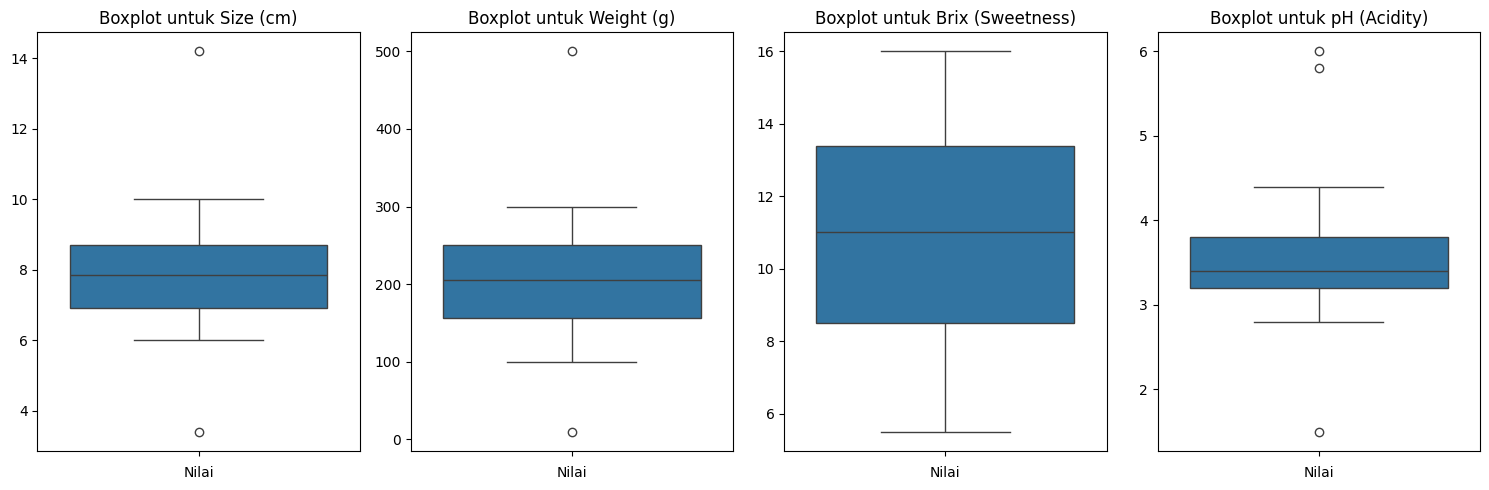

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=len(kolom_kolom), figsize=(15, 5))

for i, kolom in enumerate(kolom_kolom):
    sns.boxplot(y=df_miss_values[kolom], ax=axes[i])
    axes[i].set_title(f'Boxplot untuk {kolom}')
    axes[i].set_xlabel('Nilai')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [27]:
for kolom in kolom_kolom:
    Q1 = df_dup_fixed[kolom].quantile(0.25)
    Q3 = df_dup_fixed[kolom].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    batas_kolom[kolom] = (lower_bound, upper_bound)

outliers = {}
for kolom in kolom_kolom:
    lower_bound, upper_bound = batas_kolom[kolom]
    outliers[kolom] = df_dup_fixed[(df_dup_fixed[kolom] < lower_bound) | (df_dup_fixed[kolom] > upper_bound)]

In [28]:
for kolom, (lower_bound, upper_bound) in batas_kolom.items():
    print(f"Kolom '{kolom}':")
    print(f"  Lower Bound: {lower_bound}")
    print(f"  Upper Bound: {upper_bound}")
    print()

Kolom 'Size (cm)':
  Lower Bound: 4.200000000000002
  Upper Bound: 11.399999999999999

Kolom 'Weight (g)':
  Lower Bound: 16.0
  Upper Bound: 392.0

Kolom 'Brix (Sweetness)':
  Lower Bound: 1.1499999999999995
  Upper Bound: 20.75

Kolom 'pH (Acidity)':
  Lower Bound: 2.3000000000000007
  Upper Bound: 4.699999999999999



In [29]:
print(f"Outliers pada kolom 'Size (cm)':")
outliers['Size (cm)']

Outliers pada kolom 'Size (cm)':


,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
241,14.2,150.0,9.8,6.0,3.0,23,1.0,Deep Orange,Moro (Blood),N,4.0
243,3.4,275.0,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),N,4.0


In [30]:
print(f"Outliers pada kolom 'Weight (g)':")
outliers['Weight (g)']

Outliers pada kolom 'Weight (g)':


,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
245,6.7,500.0,6.3,3.0,4.0,21,1.0,Light Orange,Star Ruby,N,3.5
246,8.4,10.0,14.8,4.2,5.0,11,3.0,Deep Orange,Tangerine,N,4.5


In [31]:
print(f"Outliers pada kolom 'Brix (Sweetness)':")
outliers['Brix (Sweetness)']

Outliers pada kolom 'Brix (Sweetness)':


,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)


In [32]:
print(f"Outliers pada kolom 'pH (Acidity)':")
outliers['pH (Acidity)']

Outliers pada kolom 'pH (Acidity)':


,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
241,14.2,150.0,9.8,6.0,3.0,23,1.0,Deep Orange,Moro (Blood),N,4.0
242,8.2,249.0,12.8,5.8,3.0,17,3.0,Deep Orange,Tangerine,Y (Scars),4.0
244,9.1,296.0,11.1,1.5,3.0,15,1.0,Orange-Red,Tangerine,Y (Sunburn Patch),4.0


In [34]:
# Inisialisasi DataFrame baru untuk menyimpan data selain outlier
df_no_outliers = df_dup_fixed.copy()

# Loop melalui setiap kolom dan hapus baris yang merupakan outlier
for kolom in kolom_kolom:
    lower_bound, upper_bound = batas_kolom[kolom]
    df_no_outliers = df_no_outliers[~((df_no_outliers[kolom] < lower_bound) | (df_no_outliers[kolom] > upper_bound))].reset_index(drop=True)

# Cetak DataFrame baru yang hanya berisi data selain outlier
print("DataFrame baru tanpa outlier:")
df_no_outliers

DataFrame baru tanpa outlier:


,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180.000000,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220.000000,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150.000000,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250.000000,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210.000000,11.5,3.3,2.5,12,5.0,Orange,Cara Cara,Y (Minor),4.5
...,...,...,...,...,...,...,...,...,...,...,...
238,7.5,196.000000,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,Y (Minor Insect Damage),5.0
239,7.2,251.000000,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),Y (Minor Insect Damage),3.0
240,7.3,205.247934,10.5,2.9,4.0,21,2.0,Orange-Red,Jaffa,Y (Minor),4.0
241,8.2,160.000000,9.0,3.5,3.6,9,4.0,Yellow-Orange,Tangelo (Hybrid),N,4.0


In [35]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           243 non-null    float64
 1   Weight (g)          243 non-null    float64
 2   Brix (Sweetness)    243 non-null    float64
 3   pH (Acidity)        243 non-null    float64
 4   Softness (1-5)      243 non-null    float64
 5   HarvestTime (days)  243 non-null    int64  
 6   Ripeness (1-5)      243 non-null    float64
 7   Color               243 non-null    object 
 8   Variety             243 non-null    object 
 9   Blemishes (Y/N)     243 non-null    object 
 10  Quality (1-5)       243 non-null    float64
dtypes: float64(7), int64(1), object(3)
memory usage: 21.0+ KB


## Imbalance

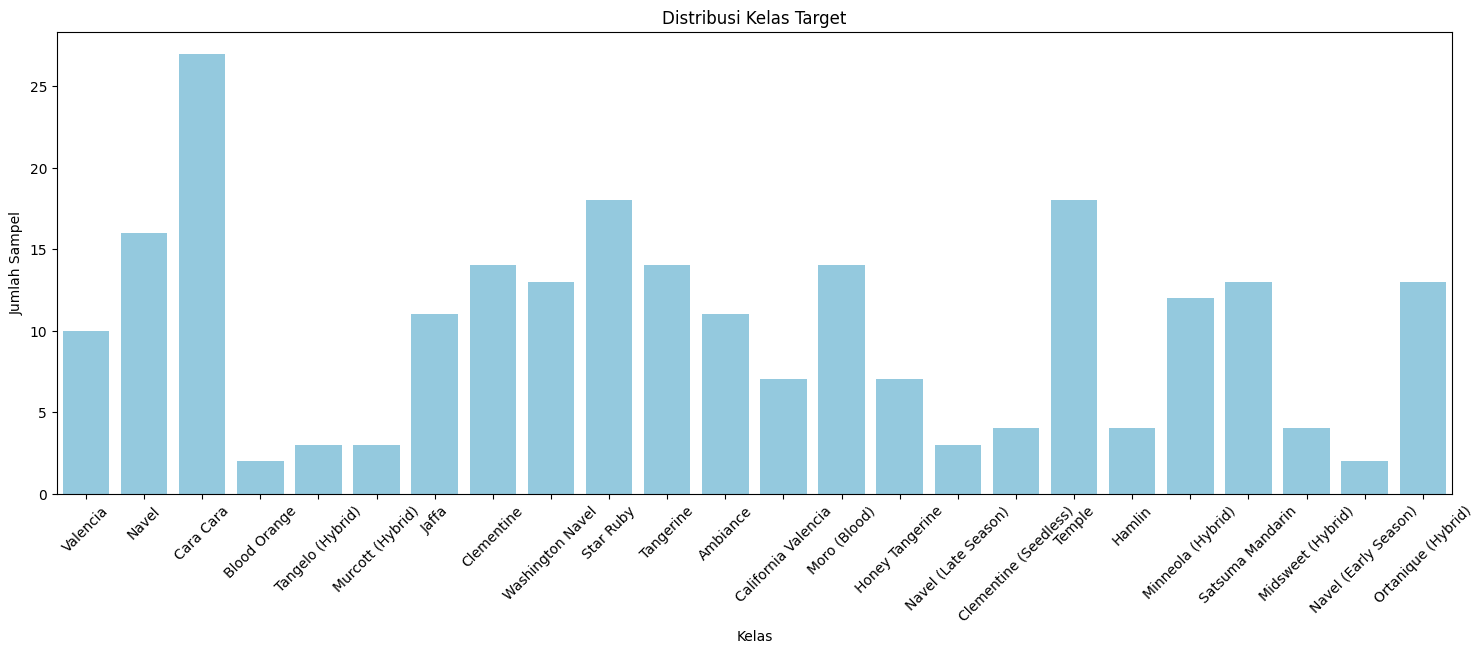

Rasio ketidakseimbangan: 0.07407407407407407


In [36]:
# Hitung jumlah sampel dalam setiap kelas
class_counts = df_no_outliers['Variety'].value_counts()

# Menampilkan kolom 'Variety'
plt.figure(figsize=(18, 6))
sns.countplot(x='Variety', data=df_no_outliers, color='skyblue')
plt.title('Distribusi Kelas Target')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=45)
plt.show()

# Hitung rasio kelas minoritas terhadap kelas mayoritas
minority_class_count = class_counts.min()
majority_class_count = class_counts.max()
imbalance_ratio = minority_class_count / majority_class_count
print("Rasio ketidakseimbangan:", imbalance_ratio)

In [37]:
df_encoded = df_no_outliers.copy()
df_encoded.shape

(243, 11)

In [38]:
colsNum = df_encoded.select_dtypes(np.number).columns
colsObj = df_encoded.columns.difference(colsNum)

In [39]:
encoder = {}

In [40]:
for col in colsObj:
    encoder[col] = preprocessing.LabelEncoder()
    df_encoded[col] = encoder[col].fit_transform(df_no_outliers[col])
df_encoded.head()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180.0,12.0,3.2,2.0,10,4.0,2,22,0,4.0
1,8.2,220.0,10.5,3.4,3.0,14,4.5,0,13,0,4.5
2,6.8,150.0,14.0,3.0,1.0,7,5.0,1,3,0,5.0
3,9.0,250.0,8.5,3.8,4.0,21,3.5,3,1,0,3.5
4,8.5,210.0,11.5,3.3,2.5,12,5.0,2,3,6,4.5


In [41]:
X = df_encoded.drop(columns=['Variety'])
y = df_encoded['Variety']
oversampler = SMOTE(k_neighbors=1, random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Variety'])], axis=1)

In [42]:
df_resampled.head(5)

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Blemishes (Y/N),Quality (1-5),Variety
0,7.5,180.0,12.0,3.2,2.0,10,4.0,2,0,4.0,22
1,8.2,220.0,10.5,3.4,3.0,14,4.5,0,0,4.5,13
2,6.8,150.0,14.0,3.0,1.0,7,5.0,1,0,5.0,3
3,9.0,250.0,8.5,3.8,4.0,21,3.5,3,0,3.5,1
4,8.5,210.0,11.5,3.3,2.5,12,5.0,2,6,4.5,3


In [43]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           648 non-null    float64
 1   Weight (g)          648 non-null    float64
 2   Brix (Sweetness)    648 non-null    float64
 3   pH (Acidity)        648 non-null    float64
 4   Softness (1-5)      648 non-null    float64
 5   HarvestTime (days)  648 non-null    int64  
 6   Ripeness (1-5)      648 non-null    float64
 7   Color               648 non-null    int32  
 8   Blemishes (Y/N)     648 non-null    int32  
 9   Quality (1-5)       648 non-null    float64
 10  Variety             648 non-null    int32  
dtypes: float64(7), int32(3), int64(1)
memory usage: 48.2 KB


In [116]:
columns_to_decode = df_no_outliers.select_dtypes(include='object').columns.to_list()

In [117]:
columns_to_decode

['Color', 'Variety', 'Blemishes (Y/N)']

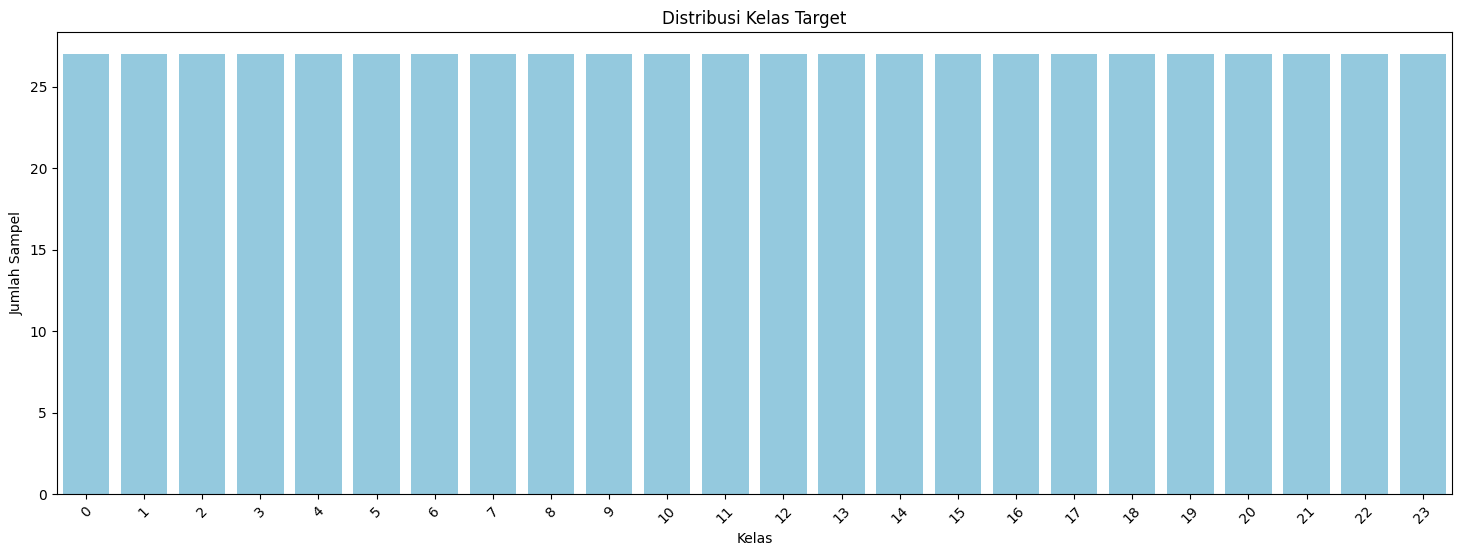

Rasio ketidakseimbangan: 1.0


In [47]:
# Hitung jumlah sampel dalam setiap kelas
class_counts = df_resampled['Variety'].value_counts()

# Menampilkan kolom 'Variety'
plt.figure(figsize=(18, 6))
sns.countplot(x='Variety', data=df_resampled, color='skyblue')
plt.title('Distribusi Kelas Target')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=45)
plt.show()

# Hitung rasio kelas minoritas terhadap kelas mayoritas
minority_class_count = class_counts.min()
majority_class_count = class_counts.max()
imbalance_ratio = minority_class_count / majority_class_count
print("Rasio ketidakseimbangan:", imbalance_ratio)

In [96]:
# df_decoded = df_resampled.copy()

In [104]:
# for col in colsObj:
#     df_encoded[col] = encoder[col].inverse_transform(df_encoded[col])
# df_encoded.head()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180.0,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220.0,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150.0,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250.0,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210.0,11.5,3.3,2.5,12,5.0,Orange,Cara Cara,Y (Minor),4.5


# EDA

## Mengelaborasi features dan tipe data (nominal, ordinal, numerical)

In [66]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           243 non-null    float64
 1   Weight (g)          243 non-null    float64
 2   Brix (Sweetness)    243 non-null    float64
 3   pH (Acidity)        243 non-null    float64
 4   Softness (1-5)      243 non-null    float64
 5   HarvestTime (days)  243 non-null    int64  
 6   Ripeness (1-5)      243 non-null    float64
 7   Color               243 non-null    object 
 8   Variety             243 non-null    object 
 9   Blemishes (Y/N)     243 non-null    object 
 10  Quality (1-5)       243 non-null    float64
dtypes: float64(7), int64(1), object(3)
memory usage: 21.0+ KB


In [140]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           648 non-null    float64
 1   Weight (g)          648 non-null    float64
 2   Brix (Sweetness)    648 non-null    float64
 3   pH (Acidity)        648 non-null    float64
 4   Softness (1-5)      648 non-null    float64
 5   HarvestTime (days)  648 non-null    int64  
 6   Ripeness (1-5)      648 non-null    float64
 7   Color               648 non-null    int32  
 8   Blemishes (Y/N)     648 non-null    int32  
 9   Quality (1-5)       648 non-null    float64
 10  Variety             648 non-null    int32  
dtypes: float64(7), int32(3), int64(1)
memory usage: 48.2 KB


In [48]:
# Tentukan kolom-kolom yang ingin Anda hitung statistiknya
columns_to_agg = ['Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)']

In [49]:
df_resampled[columns_to_agg].agg(['mean', 'median', lambda x: x.mode().iloc[0]])

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity)
mean,7.887548,202.877007,10.861639,3.441124
median,7.928727,205.000000,11.000000,3.395425
<lambda>,8.400000,160.000000,9.000000,2.900000


In [50]:

df_resampled[columns_to_agg].describe().loc[['min', '25%', '50%', '75%', 'max']]

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity)
min,6.000000,100.000000,5.500000,2.800000
25%,7.100000,160.000000,9.000000,3.170022
50%,7.928727,205.000000,11.000000,3.395425
75%,8.500000,241.606511,12.903769,3.700000
max,10.000000,300.000000,16.000000,4.400000


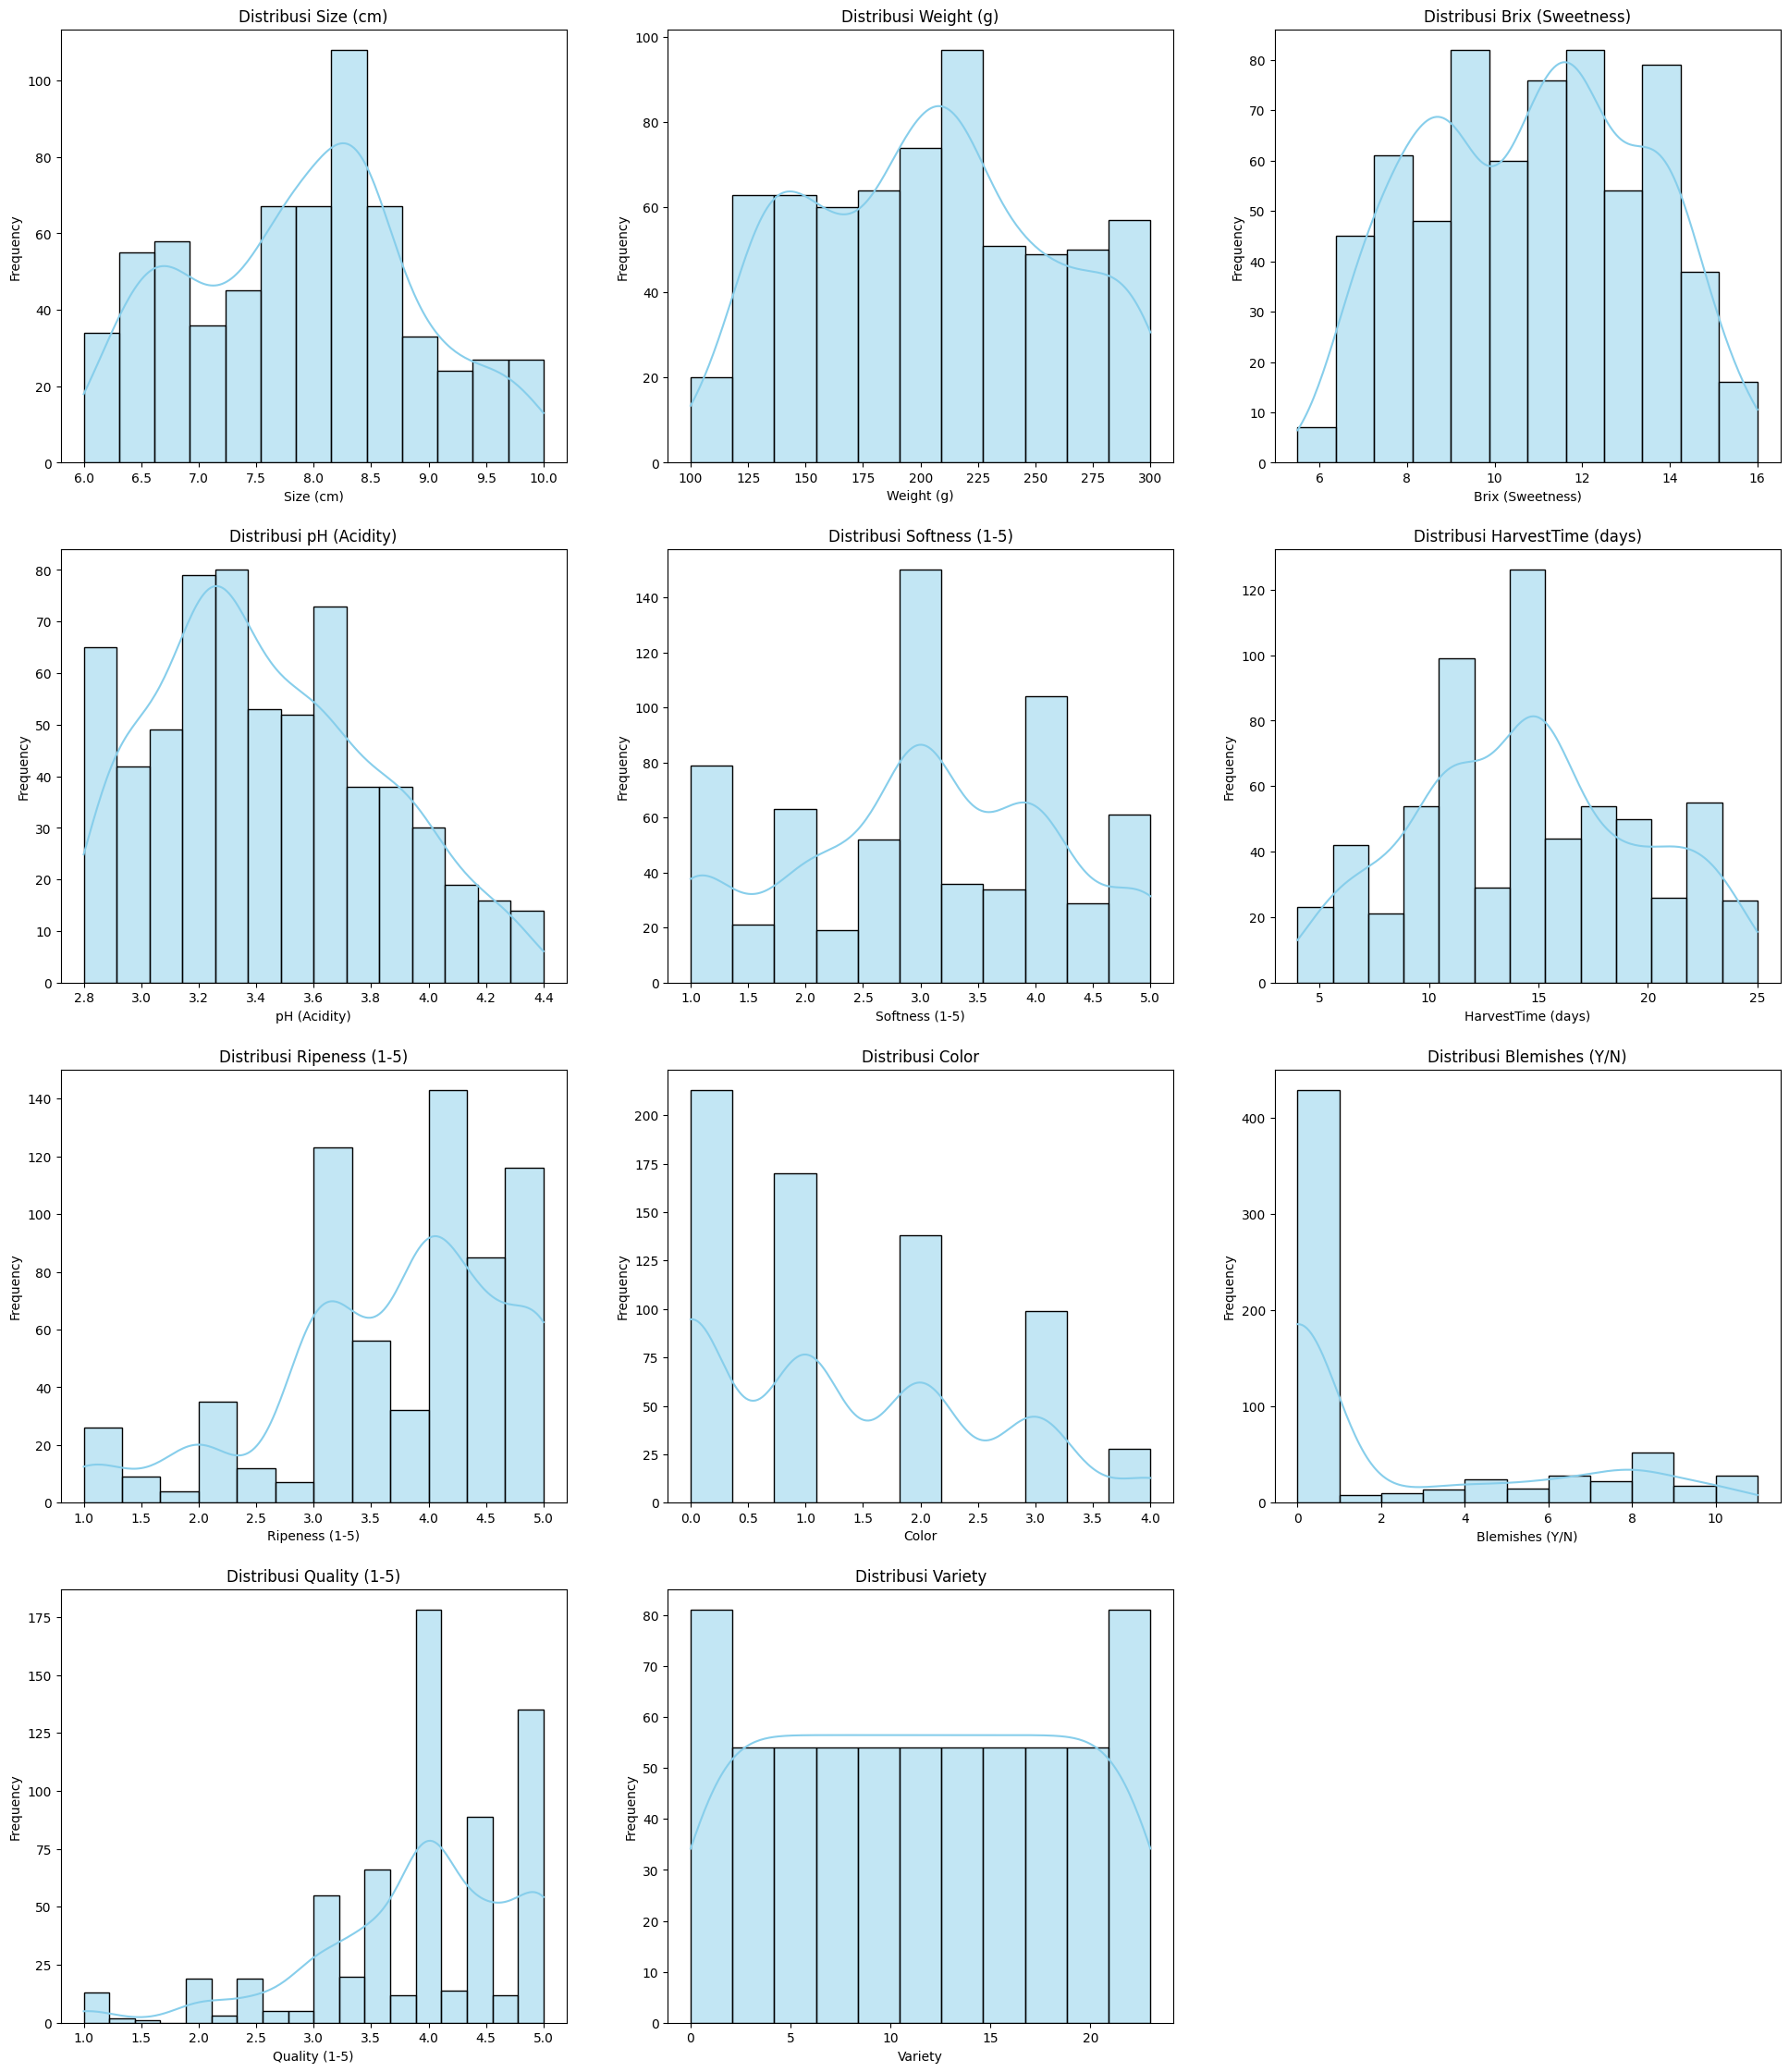

In [51]:
numeric_columns = df_resampled.select_dtypes(include='number').columns
num_plots = len(numeric_columns)
num_cols = 3
num_rows = num_plots // num_cols
if num_plots % num_cols:
    num_rows += 1
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(24, 28))
    
for i, column in enumerate(numeric_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
        
    sns.histplot(df_resampled[column], kde=True, ax=ax, color='skyblue')
    ax.set_title(f'Distribusi {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(False)
    
for i in range(num_plots, num_rows * num_cols):
    plt.delaxes(plt.subplot(num_rows, num_cols, i + 1))
    
plt.show()

# Feature Importance

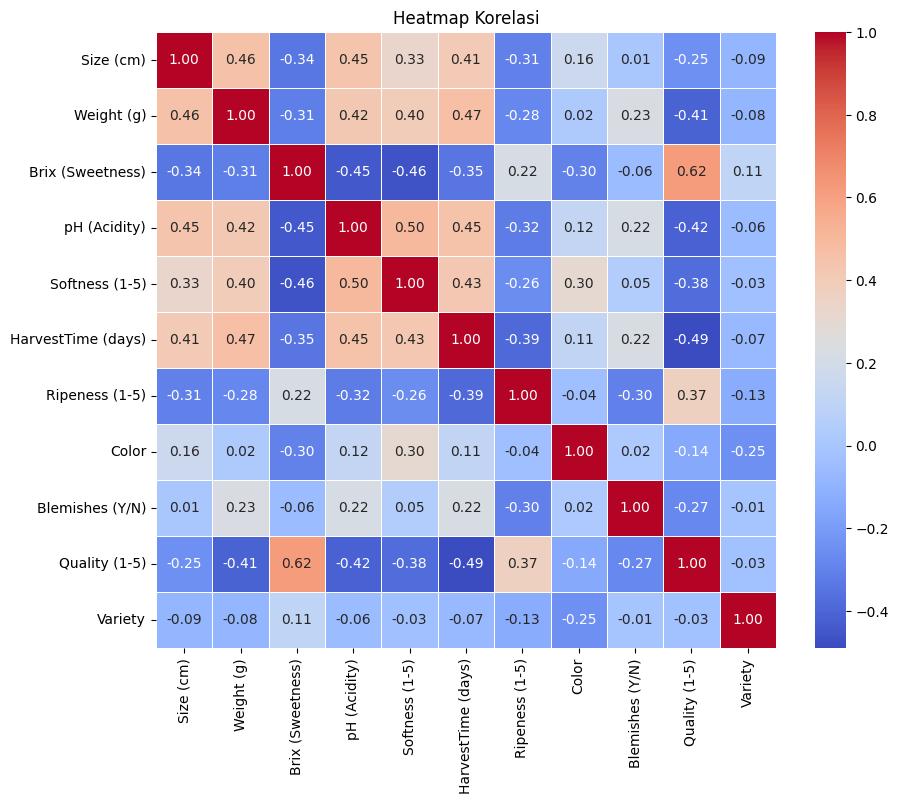

In [141]:
# Hitung matriks korelasi
correlation_matrix = df_resampled.corr()

# Buat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()